In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 11s 5us/step


In [3]:
len(train_data)


8982

In [4]:
len(test_data)


2246

In [9]:
for i in range (10):
    print(train_data[i])
    i+=1


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2678, 92, 617

In [10]:
for i in range (10):
    print(train_labels[i])
    i+=1

3
4
3
4
4
4
4
3
3
16


In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [24]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [25]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 894us/sample - loss: 2.6552 - accuracy: 0.4555 - val_loss: 1.7545 - val_accuracy: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 187us/sample - loss: 1.4062 - accuracy: 0.7081 - val_loss: 1.2689 - val_accuracy: 0.7300
Epoch 3/20
7982/7982 [==============================] - 1s 168us/sample - loss: 1.0264 - accuracy: 0.7828 - val_loss: 1.1177 - val_accuracy: 0.7720
Epoch 4/20
7982/7982 [==============================] - 1s 170us/sample - loss: 0.8066 - accuracy: 0.8314 - val_loss: 1.0141 - val_accuracy: 0.7960
Epoch 5/20
7982/7982 [==============================] - 1s 146us/sample - loss: 0.6426 - accuracy: 0.8691 - val_loss: 0.9789 - val_accuracy: 0.7910
Epoch 6/20
7982/7982 [==============================] - 1s 177us/sample - loss: 0.5166 - accuracy: 0.8964 - val_loss: 0.9175 - val_accuracy: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 157us

In [26]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

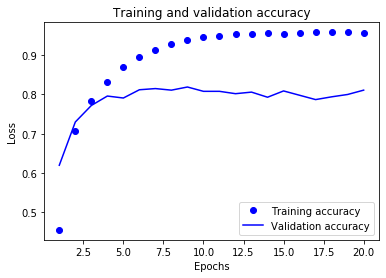

In [28]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 5s 590us/sample - loss: 2.6387 - accuracy: 0.5481 - val_loss: 1.7875 - val_accuracy: 0.6280
Epoch 2/9
7982/7982 [==============================] - 1s 175us/sample - loss: 1.4263 - accuracy: 0.7116 - val_loss: 1.3250 - val_accuracy: 0.7140
Epoch 3/9
7982/7982 [==============================] - 1s 176us/sample - loss: 1.0464 - accuracy: 0.7766 - val_loss: 1.1770 - val_accuracy: 0.7460
Epoch 4/9
7982/7982 [==============================] - 1s 181us/sample - loss: 0.8300 - accuracy: 0.8211 - val_loss: 1.0523 - val_accuracy: 0.7840
Epoch 5/9
7982/7982 [==============================] - 1s 174us/sample - loss: 0.6666 - accuracy: 0.8588 - val_loss: 0.9921 - val_accuracy: 0.8010
Epoch 6/9
7982/7982 [==============================] - 1s 169us/sample - loss: 0.5353 - accuracy: 0.8900 - val_loss: 0.9556 - val_accuracy: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 150us/sample

In [37]:
results

[0.9794580032012341, 0.7880677]